Shape of dataset: (284807, 31)
Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85280    15]
 [   57    91]]


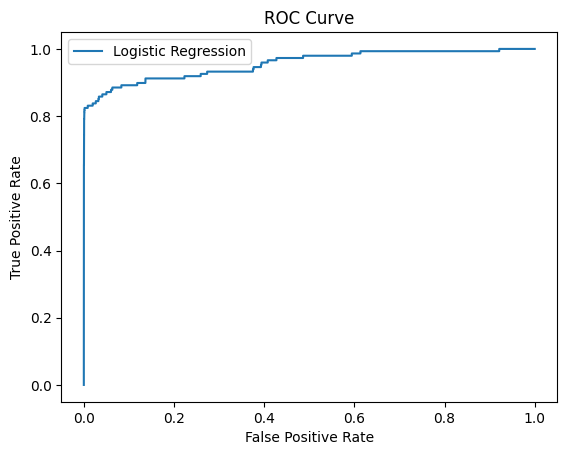

ROC AUC Score: 0.9555491038256734


In [3]:
# fraud_detection.ipynb

# 📦 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 📂 Step 2: Load dataset
df = pd.read_csv('data/creditcard.csv')
print("Shape of dataset:", df.shape)
df.head()

# 🔍 Step 3: EDA (Exploratory Data Analysis)
print("Class distribution:\n", df['Class'].value_counts())

# 🎯 Step 4: Preprocessing
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔀 Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 🤖 Step 6: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 🧾 Step 7: Evaluate
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 📊 ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 🔢 AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
